# Analysis for a Chip with 4 qubits and 4 CPWs

* CPWCPW: Superconducting coplanar waveguide (CPW) resonators
* See https://qiskit-community.github.io/qiskit-metal/

## Resources
* SUPERCONDUCTING COPLANAR WAVEGUIDE RESONATORS https://qct.ifae.es/files/Alberto_Lajara_Coplanar_Waveguide_Resonators_for_QC_2020.pdf

## Library includes

In [1]:
import qiskit_metal as metal
from qiskit_metal import designs, MetalGUI
from qiskit_metal import Dict, Headings

Display Ansys renderer options

In [2]:
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
QAnsysRenderer.default_options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'max_mesh_length_port': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

## Create a Planar design


In [3]:
# 1. Add code to create a desing

# 2. Instanciate a metal gui with the design


## Add  of 4 qubits and 4 CPWs

Set the chip dimensions

In [4]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

# Add code to set the chip dimensions


### Create 4 transmon qubits


In [5]:
# Enable overwrite, so that we can re-un this cell multiple times without incurring object name collisions
design.overwrite_enabled = True

# We now define the same custom options for all the transmons.
# We only list the options we intend to modify with respect to the default values
options = Dict(
    pad_width = '425 um',
    pocket_height = '650um',
    # Adding 3 connection_pads
    connection_pads=Dict(
        a = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

# Create the 4 transmons
q1 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.42251mm', pos_y='+0.0mm', **options))

# Add code to create 3 extra transm on qubit here...


### Create 4 CPWs
Coplanar waveguide resonators (CPWs) 

In [6]:
# Now we do the same for the CPWs
options = Dict(
        lead=Dict(
            start_straight='0.2mm',
            end_straight='0.2mm'),
        trace_gap='9um',
        trace_width='15um')

# We define a handy method to shorten the number of line of code necessary to define the 4 CPW
def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str, asymmetry='0 um', flip=False, fillet='90um'):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        fillet=fillet,
        hfss_wire_bonds = True,
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        total_length=length)
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

# Create the 4 CPWs
asym = 140
cpw1 = connect('cpw1', 'Q1', 'c', 'Q2', 'b', '5.6 mm', f'+{asym}um') # Q1 -> Q2
cpw2 = connect('cpw2', 'Q3', 'b', 'Q2', 'c', '5.7 mm', f'-{asym}um', flip=True)

# Add code to create the other 2 resonators here..
# Q3 -> Q4
# Q1 -> Q4

### Render the entire Design in the UI

Spawn the Metal IDE an display the design.

In [7]:
# Render the entire design to the Qiskit Metal GUI
# Add code here... Tip: gui.rebuild(), gui.autoscale()


In [8]:
# Display the junctions
# SOMETHING HERE...tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,1,rect_jj,"LINESTRING (2.42251 -0.01500, 2.42251 0.01500)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
1,2,rect_jj,"LINESTRING (-0.01500 -0.95000, 0.01500 -0.95000)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
2,3,rect_jj,"LINESTRING (-2.42251 0.01500, -2.42251 -0.01500)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
3,4,rect_jj,"LINESTRING (0.01500 0.95000, -0.01500 0.95000)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction


You can observe in the table above that every junction has been assigned a default inductance, capacitance and resistance values, based on the originating component class default_options. In this example we intend to replace those values with a variable name, which will later be set directly in the renderer. 

In [9]:
# Update capacitance, inductance variable names
qcomps = design.components  # short handle (alias)
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'

qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'

# Add code for Qubit 3 here...

# Add code for Qubit 4 here...

gui.rebuild()  # line needed to propagate the updates from the qubit instance into the junction design table
gui.autoscale()

## Render into Ansys HFSS ( 3D High Frequency Simulation Software)

Create a  handle to refer to it in the rest of this notebook.

In [10]:
# Ansys Handle
fourq_hfss = design.renderers.hfss

### Start Ansys
NOTE: The design will be added to the project that was active when the command fourq_hfss.start() was executed. Note: If a design named HFSSTransmonQubit already exists in the project, a new design will be created, with the name suffixed with an incremental integer: HFSSTransmonQubit1, HFSSTransmonQubit2, etc.

In [11]:
# Start Ansys to render your design. This is optional. You can skip to the Analysis section if you wish.
fourq_hfss.start()

INFO 01:49PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:49PM [load_ansys_project]: 	Opened Ansys App
INFO 01:49PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 01:49PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/vsilva/Documents/Ansoft/
	Project:   Project2
INFO 01:49PM [connect_design]: No active design found (or error getting active design).
INFO 01:49PM [connect]: 	 Connected to project "Project2". No design detected


True

### Create an Eigenmode design

The design name will display in the Ansys IDE

In [12]:
ansys_design = fourq_hfss.new_ansys_design("HFSSMetalEigenmode", 'eigenmode')
ansys_design.name

INFO 01:50PM [connect_design]: 	Opened active design
	Design:    HFSSMetalEigenmode [Solution type: Eigenmode]
WARNING 01:50PM [connect_setup]: 	No design setup detected.
WARNING 01:50PM [connect_setup]: 	Creating eigenmode default setup.
INFO 01:50PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


'HFSSMetalEigenmode'

### Create a Drivenmodal design

Note: You can create multiple designs, the switch beteween them.

In [13]:
#ansys_design1 = fourq_hfss.new_ansys_design("HFSSMetalDrivenModal", 'drivenmodal')
#ansys_design1.name

### Selecting a design previously created

In [14]:
# Optional: activate a particular design
fourq_hfss.activate_ansys_design("HFSSMetalEigenmode")

# fourq_hfss.activate_ansys_design("HFSSMetalDrivenModal")

INFO 01:16PM [connect_design]: 	Opened active design
	Design:    HFSSMetalEigenmode [Solution type: Eigenmode]


### Render Full Design

In [13]:
fourq_hfss.render_design()  # entire Metal design.

#fourq_hfss.clean_active_design()
#fourq_hfss.render_design(['Q1'], [('Q1', 'b'), ('Q1', 'c')])  # single qubit with 2 endcaps.

#fourq_hfss.clean_active_design()
#fourq_hfss.render_design(['Q1', 'cpw1', 'Q2'], [('Q1', 'b'), ('Q2', 'c')])  # 2 qubits and 2 endcaps, one per qubit.

# For Driven-Modal analysis, we can also add terminations. In the example below we render 1 qubit with 1 endcap and 1 port with a 70 Ohm termination.
#fourq_hfss.clean_active_design()
#fourq_hfss.render_design(['Q2'], [('Q2', 'a')], [('Q2', 'b', '70')])

## Perform Eigenmode Analisys

In [14]:
from qiskit_metal.analyses.quantization import EPRanalysis

# Analisys handle
eig_4qb = EPRanalysis(design, "hfss")


In [15]:
# Add analisys setup code here
eig_4qb.sim.setup.max_passes = 5
eig_4qb.sim.setup.max_delta_f = 0.05

# Add n_modes = 2

# Add vars = Dict(Lj1= '13 nH', Cj1= '0 fF', Lj2= '9 nH', Cj2= '0 fF')

# Display setup tip: sim.setup


{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.05,
 'max_passes': 5,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj1': '13 nH', 'Cj1': '0 fF', 'Lj2': '9 nH', 'Cj2': '0 fF'}}

### Set render options

In [16]:
eig_4qb.sim.renderer.options['x_buffer_width_mm'] = 0.5

# Add renderer.options['y_buffer_width_mm'] = 0.5

# Display render options. Tip: renderer.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'max_mesh_length_port': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [17]:
# Add code to rin the analisys. Tip sim.run(name="FourTransmons", components=['cpw1', 'Q1', 'Q2', 'Q3','Q4'])
# Note: set the components to: cpw1..cpw4, Q1..Q4


INFO 01:51PM [connect_design]: 	Opened active design
	Design:    FourTransmons_hfss [Solution type: Eigenmode]
WARNING 01:51PM [connect_setup]: 	No design setup detected.
WARNING 01:51PM [connect_setup]: 	Creating eigenmode default setup.
INFO 01:51PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:51PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:51PM [analyze]: Analyzing setup Setup
01:51PM 53s INFO [get_f_convergence]: Saved convergences to C:\Users\vsilva\Documents\NCSU\etc\Hackathons\hfss_eig_f_convergence.csv


In [18]:
# Plot convergences. This will display the sim results in a metal Plot Dialog
# SOMETHING-HERE.sim.plot_convergences()

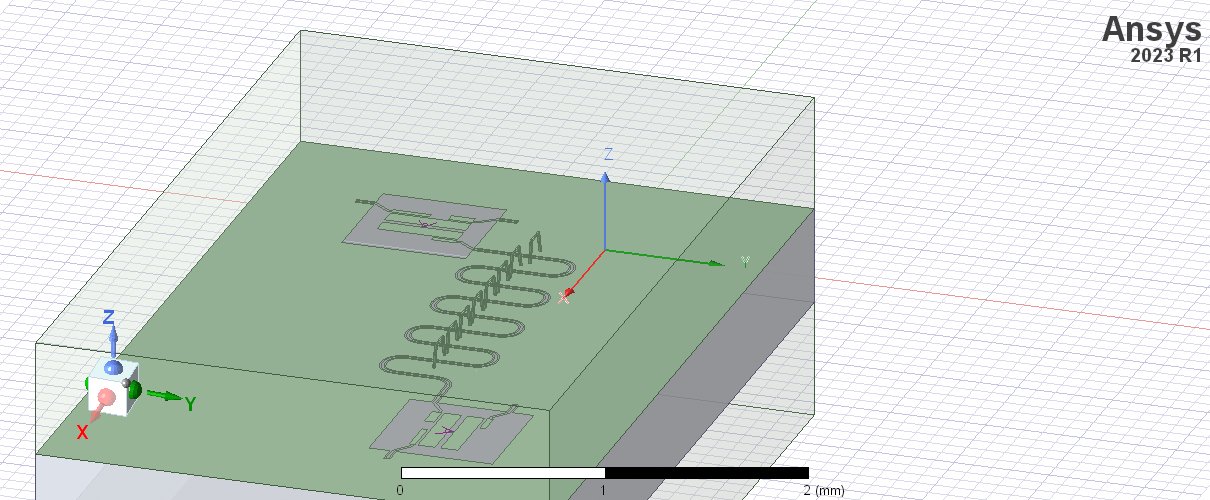

WindowsPath('C:/Users/vsilva/Documents/NCSU/etc/Hackathons/ansys.png')

In [19]:
# Save a screen shot of the rendering
# HANDLE.sim.save_screenshot()  # optional

## Cleanup

You need to shutdown the Ansys connection, else you will not be able to exit the app.

In [20]:
if fourq_hfss != None :
    fourq_hfss.stop()

# Eigen mode analysis )add code here)
#HANDLE.sim.close()

In [21]:
# Close metal window
# Tip: GUI.main_window.close()

True

## Good Job. You are done!

Take screen shot, save this notebook and PDF and submit.